# Lab Report 1 - Our first Machine Learning Project (Week 2 & 3)

<hr style="border:2px solid gray">

## Index: <a id='index'></a>
1. [Building a Machine Learning Model](#model)
1. [The dataset](#dataset)
1. [Decision Trees](#DT)
1. [Expectations](#expectations)
1. [Nearest Neighbours](#knn)


<hr style="border:2px solid gray">

## Section 1: Building a Machine Learning Model  [^](#index) <a id='model'></a>

It is now time to build our very first machine learning model! First of all we need to understand what building a model means. Last week, we saw that the machine learning process involves the following steps:
1. **Problem formulation:** Define the problem that you want to solve. What
are you trying to predict or classify? What data do you have available?
2. **Data collection:** Collect the data that you need to train the model.
This data should be representative of the data that you will use to make
predictions.
3. **Data preparation and feature engineering:** Prepare the data for training, such as cleaning and
transforming it. This may involve removing outliers, imputing missing
values, and normalizing the data. Select the features that are most important for the
problem. This may involve creating new features or removing irrelevant
features.
5. **Model selection and training:** Choose the machine learning algorithm that is most
suitable for your problem. There are many different machine learning
algorithms available, and the best algorithm for your problem will depend
on the specific data and the desired outcome. Train the model on the data. This involves feeding the
data to the algorithm and letting it learn how to make predictions.
7. **Model evaluation:** Evaluate the model on a held-out dataset. This is
a dataset that was not used to train the model. The evaluation will help
you to assess the accuracy of the model and identify any problems.
8. **Model tuning:** Tune the hyperparameters of the model to improve its
performance.

Today it's your lucky day as I will give you point 1 and point 2, and we will focus a lot of this notebook on understanding point 3 to point 6.

## 1.1 Problem formulation

Today we want to search for intelligent life beyond Earth. We want to look for planets that could host human life. This exercise was mostly taken from MLPA ("Machine Learning for Physics and Astronomy" by Viviana Aquaviva), although the dataset is slightly different. You can check out chapter 2 of that book more info on the exercise.

In the cell below, **define the problem that we want to solve**. Are we trying to predict? Or classify? Do you think we should use supervised learning or unsupervised learning for this task?

Along with our problem formulation, I think we realise that we will need a bunch of python modules to perform our project. I like to import them all at the beginning as it only needs to be done once per session, and I also like to group them thematically.

In [2]:
import pandas as pd
import numpy as np
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import metrics


import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import colors

#import UsedForMCQs

<hr style="border:2px solid gray">

## Section 2: The dataset [^](#index) <a id='dataset'></a>

### 2.1 Find the appropriate dataset
In the second step, we collect the data that we need to train our model. In this case we were lucky and the [Habitable Worlds Catalogue]('https://phl.upr.edu/hwc') has done this for us already. It lists up to potentially habitable worlds in a list of over five thousand known exoplanets, putting together information gathered by several observatories, including the Kepler and K2 missions and the ongoing Transiting Exoplanet Survey Satellite.

As this is our very first machine learning project, it may be daunting to look at a 5000+ dataset with tens of features, so I made smaller set for you, made of 18 instances, 3 features and our target labels. This is in the csv file called `HabPlanets_simple.csv`.

### 2.2 Read the dataset
In week 1, you learned to use the `read_csv` function from the `panda` module, so I left the cell below for you to complete:

In [3]:
LearningSet=pd.read_csv('data/HabPlanets_simple.csv')

### 2.3 Check that the dataset has been read correctly

Check that your dataset has been read correctly by exploring its structure (displaying the whole `LearningSet`, and using `head()` or `describe(`). **NB You shouldn't be plotting the dataset at this stage as you have not split it into the training and test set yet.**

In [5]:
LearningSet

,P_NAME,S_MASS,P_PERIOD,P_DISTANCE,P_HABITABLE
0,LP 791-18 d,0.14,2.753436,0.019920,0
1,TRAPPIST-1 d,0.09,4.049219,0.022271,1
2,Kepler-477 b,0.87,11.119907,0.091100,0
3,Kepler-1649 c,0.20,19.535270,0.064900,1
4,TOI-1260 c,0.68,7.493134,0.065700,0
5,tau Cet e,0.78,162.870000,0.546716,0
6,LP 890-9 c,0.12,8.457463,0.039840,1
7,TRAPPIST-1 f,0.09,9.207540,0.038492,1
8,TRAPPIST-1 e,0.09,6.101013,0.029250,1
9,K2-283 b,0.89,1.921036,0.029100,0


In [6]:
LearningSet.head()

,P_NAME,S_MASS,P_PERIOD,P_DISTANCE,P_HABITABLE
0,LP 791-18 d,0.14,2.753436,0.019920,0
1,TRAPPIST-1 d,0.09,4.049219,0.022271,1
2,Kepler-477 b,0.87,11.119907,0.091100,0
3,Kepler-1649 c,0.20,19.535270,0.064900,1
4,TOI-1260 c,0.68,7.493134,0.065700,0


In [7]:
LearningSet.describe()

,S_MASS,P_PERIOD,P_DISTANCE,P_HABITABLE
count,18.000000,18.000000,18.000000,18.000000
mean,0.546667,24.186348,0.112325,0.444444
std,0.387572,37.570042,0.126447,0.511310
min,0.090000,1.921036,0.019920,0.000000
25%,0.155000,6.296604,0.038829,0.000000
50%,0.550000,10.163723,0.066750,0.000000
75%,0.865000,25.741152,0.130692,1.000000
max,1.200000,162.870000,0.546716,1.000000


### 2.4 Understand the features 
The dataset includes 3 features and one target. Looking at the website source we can see that the column features refer to:
 - S_MASS - star mass (solar units).
 - P_PERIOD - planet period (days).
 - P_DISTANCE - planet mean distance from the star (AU).
 - P_HABITABLE - boolean variable telling us if the planet is habitable or not.

You can change the column names to something handier, or keep them as they are, the important thing is that you remember what they mean.

In [10]:
df = LearningSet.rename(columns={'P_NAME': 'name', 'S_MASS': 'solar_mass', 'P_PERIOD': 'period_days', 'P_DISTANCE': 
                                 'distance_from_star', 'P_HABITABLE': 'target'})
df

,name,solar_mass,period_days,distance_from_star,target
0,LP 791-18 d,0.14,2.753436,0.019920,0
1,TRAPPIST-1 d,0.09,4.049219,0.022271,1
2,Kepler-477 b,0.87,11.119907,0.091100,0
3,Kepler-1649 c,0.20,19.535270,0.064900,1
4,TOI-1260 c,0.68,7.493134,0.065700,0
5,tau Cet e,0.78,162.870000,0.546716,0
6,LP 890-9 c,0.12,8.457463,0.039840,1
7,TRAPPIST-1 f,0.09,9.207540,0.038492,1
8,TRAPPIST-1 e,0.09,6.101013,0.029250,1
9,K2-283 b,0.89,1.921036,0.029100,0


<div style="background-color:#C2F5DD">

## Exercise 1
When dealing with a new dataset it's useful to answer these questions.
1. What's the size of the dataset?
2. Are there any missing data? if yes, how should you handle them?
3. Are all the features in a similar numerical range and is there anything unusual about the distribution of the numerical values?
4. Is the dataset imbalanced (ie one or more classes are much more heavily populated than others)?
5. Start developing some intuition on how well you expect the model to work: are these features meaningful? do we have enough samples?

In [12]:
df.shape

(18, 5)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                18 non-null     object 
 1   solar_mass          18 non-null     float64
 2   period_days         18 non-null     float64
 3   distance_from_star  18 non-null     float64
 4   target              18 non-null     int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 852.0+ bytes


In [15]:
df[['solar_mass', 'period_days', 'distance_from_star']].describe()

,solar_mass,period_days,distance_from_star
count,18.000000,18.000000,18.000000
mean,0.546667,24.186348,0.112325
std,0.387572,37.570042,0.126447
min,0.090000,1.921036,0.019920
25%,0.155000,6.296604,0.038829
50%,0.550000,10.163723,0.066750
75%,0.865000,25.741152,0.130692
max,1.200000,162.870000,0.546716


In [19]:
df['target'].value_counts()

target
0    10
1     8
Name: count, dtype: int64

## 1.3 Data preparation and feature engineering

This step involves preparing the data for training, such as cleaning and transforming it. This may involve removing outliers, imputing missing values, and normalising the data. Select the features that are most important for the problem. This may involve creating new features or removing irrelevant features.

### 1.3.1 Splitting between the Train and Test set
The first thing we will want to do is split the data set into training and test sets. Normally the train/test split choice happens at random, but for this notebook we will choose a specific split so that the results are reproducible.
Use the first 13 instances of the dataframe as a train set and the last 5 as a test set (*hint: you could use the `panda` method `iloc` for this)*.

In [20]:
TrainSet = df.iloc[:13]
TestSet = df.iloc[-5:]

Now create `Xtrain` and `Xtest` sets which will not have the name and habitable columns (*hint: you can use `drop` to do this*). And create your label sets `ytrain` and `ytest` which will only include the habitable column.

In [25]:
Xtrain = TrainSet.drop(columns=['target'])
Xtest = TestSet.drop(columns=['target'])
ytrain = TrainSet['target']
ytest  = TestSet['target']

Verify that the `shape` of `Xtrain`, `Xtest`, `ytrain`, `ytest` is what you expect.

In [26]:
Xtrain.shape, Xtest.shape

((13, 4), (5, 4))

<div style="background-color:#C2F5DD">

## Exercise 2
Plot the train and test set in a nice scatter graph. I added some bits of code which I know will make the plot prettier once you have correctly defined everything. We want the following features:
1. Plot a scatter graph of the `Xtrain` dataset (mass of parent star on the x-axis and the orbital period on the y axis), and using the `ytrain` as the `c` option for the colormap (`cmap` has already been defined for you below), `*` as markers, and an `alpha` of 0.5. We will want to label this `Train`.
2. Add a scatter graph of the `Xtest` dataset (mass of parent star on the x-axis and the orbital period on the y axis), and using the `ytest` as the `c` option for the colormap, `o` as markers, and an `alpha` of 0.5. We will want to label this `Test`.
3. Add descriptive axis labels (including units)
4. The y axis should be in a logarithmic scale
5. Plot the legend

3. Using `plt.axvline` and `plt.axhline` plot a horizontal line at 3.5 and a vertical line at 0.5.



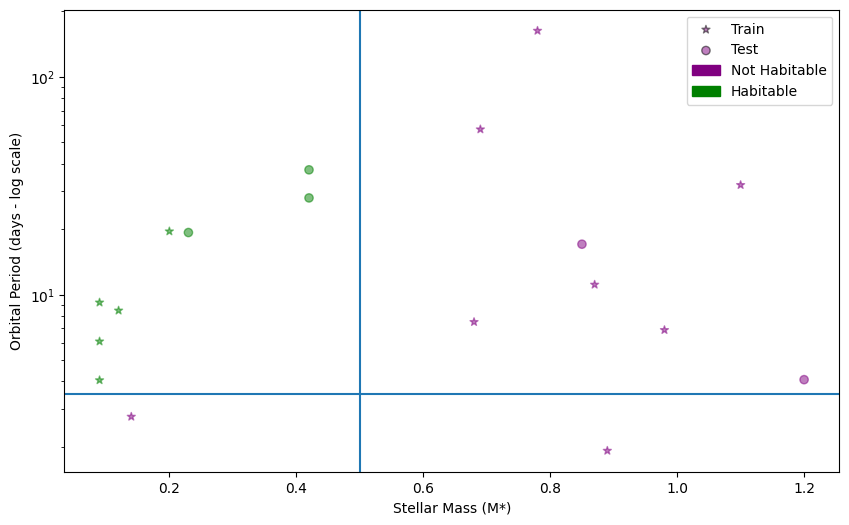

In [47]:
plt.figure(figsize=(10,6))
cmap = colors.ListedColormap(['purple', 'green'])

plt.scatter(Xtrain['solar_mass'], Xtrain['period_days'], c=ytrain, marker='*', 
            vmin=0, vmax=1, cmap=cmap, alpha=0.5, label='Train')
plt.scatter(Xtest['solar_mass'], Xtest['period_days'], c=ytest, marker='o', 
            vmin=0, vmax=1, cmap=cmap, alpha=0.5, label='Test')

purplepatch = mpatches.Patch(color='purple', label='Not Habitable')
greenpatch = mpatches.Patch(color='green', label='Habitable')

ax = plt.gca()
leg = ax.legend()
leg.legend_handles[0].set_color('k')
leg.legend_handles[1].set_color('k')
plt.legend(handles=[leg.legend_handles[0],leg.legend_handles[1], purplepatch, greenpatch])
plt.xlabel('Stellar Mass (M*)')
plt.ylabel('Orbital Period (days - log scale)')
plt.axvline(0.5)
plt.axhline(3.5)
ax.set_yscale('log')
plt.show()

<hr style="border:2px solid gray">

## Section 3: Decision Trees  [^](#index) <a id='DT'></a>


A decision tree is a type of machine learning algorithm that uses a tree-like structure to make decisions or predictions. It's often used in supervised learning tasks, (where you have a dataset with labeled examples and you want to learn a model that can predict the labels for new, unseen examples).

Here's how a decision tree works:
 - **Start at the root node.** This node represents the entire dataset.
 - **Ask a question about one of the features in the data.** The answer to the question will determine which branch of the tree to take.
 - **Continue asking questions and following branches until you reach a leaf node.** The leaf node represents a prediction or classification.

A good decision is characterised by efficient splits, which has the maximum information gain or maximum decrease of impurity. A metric that is often is used is the **Gini impurity** defined as:
$$
 I_G = 1 - \sum_i f(i)^2
$$
where $f(i)$ is the fractional abundance of each class.

To calculate if a split is convenient or not, we need to perform 3 steps:
1. Calculate the Gini impurity of the current dataset.
2. Calculate the Gini impurity of the proposed split.
3. Calculate the difference between the two.

The largest decrease in impurity will be the preferable option. **NB. The Gini impurity of a proposed split is the sum of the fractional impurities of the two resulting nodes, weighted by the fractional volume of each node with respect to its parent node.**

<div style="background-color:#C2F5DD">

## Exercise 3
Using the two lines defined in the scatter plot above and the definition of the Gini impurity, assess whether it is more convenient to split the **train** dataset vertically and then horizontally or the other way round. When calculting


## Train the model!
It's time to train our Decision Tree and see if our model finds our same results. The following cells does two things:
 - It defines our model as our decision tree classifier
 - It then trains the model with out train set
The `random_state` variable in this case is set to a specific value for reproducibility purposes 

In [ ]:
model = DecisionTreeClassifier(random_state=3)
model.fit(Xtrain,ytrain)

#### Let's visualize the graph!

In [ ]:
plot_tree(model, feature_names=['Stellar Mass (M*)', 'Orbital Period (d)', 'Distance (AU)'], 
          class_names=['Not Habitable','Habitable'], filled = True, rounded = True)
plt.show()

These numbers are a little bit different from what we found above. Can you guess why?

In [ ]:
# Because we only looked at 2 features, whereas the DT is looking at 3 features.

### Let's take a look at some metrics.
Using the `model.predict` function, apply the model to `Xtest` and calculate our prediction on the test set and on the training set.

In [ ]:
ytestpred = ...
ytrainpred = ...

Using the `metrics` module you can calculate the `accuracy_score` and compare the performance of the two

In [ ]:
test_accuracy  = ...
train_accuracy = ...
print("The accuracy of the test set is {:.3f}".format(test_accuracy))
print("The accuracy of the train set is {:.3f}".format(train_accuracy))


The following cells make a pretty Confusion Matrix and print out the number of true negatives, true positives, false negatives and false positives.

In [ ]:
cm = metrics.confusion_matrix(ytest,ytestpred, labels=model.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=['Not Habitable','Habitable'])
disp.plot()

print("Number of True Negatives: {:.3f}".format(cm[0,0]))
print("Number of True Positives: {:.3f}".format(cm[1,1]))
print("Number of False Negatives: {:.3f}".format(cm[1,0]))
print("Number of False Positives: {:.3f}".format(cm[0,1]))

<div style="background-color:#C2F5DD">

## Exercise 4
Repeat the same exercise but with taking the first 5 instances of the `LearningSet` as our test set and the last 13 as our training set:
1. Plot a scatter graph of the new train set and test set.
2. Train the new model (using again `random_state=3` to have reproducibility)
3. Visualise the decision tree
4. Calculate and display the new accuracy
5. Discuss which training is better

<hr style="border:2px solid gray">

## Section 4: Nearest Neighbours  [^](#index) <a id='neighbor'></a>

The nearest neighbour method, also known as the k-nearest neighbours (k-NN) algorithm, is a simple yet powerful technique in machine learning used for both classification and regression tasks. It works on the fundamental assumption that similar data points are likely to have similar labels or values.
We can use it in a similar way just by calling the classifier from `scikit-learn`. In this case we use the `KNeighborsClassifier`.


<div style="background-color:#C2F5DD">

## Exercise 5

1. Define the new model as the `KNeighborsClassifier` using the option of `n_neighbor=3` (we use just 3 neighbors as this is a very small dataset, the default is 5 neighbours). Train the dataset using the `fit` method as you've done previously.
2. Use the `predict` method from the model to get the predictions and calculate the accuracy scores.
3. Plot the confusion matrix and print out the number of true positives, true negatives, false positives, false negatives.
4. What do you think about this classifier? did it work well?
5. Plot the scatter graph of the test and train set again (yes the usual one!) but without the logarithmic y-axis. Then, use the code below to plot the 5 circles representing the circle of the closest 3 instances to the 5 test points. (Yes, I am giving you the code for this one!). Does this explain the results of the training?

```
dist, ind = model.kneighbors(Xtest)

for index in range(5):
    x0 = TestSet.loc[index, 'S_MASS']
    y0 = TestSet.loc[index, 'P_PERIOD']
    r0 = dist[index].max()
    circle=plt.Circle((x0, y0), r0, color='r', fill=False)
    ax = plt.gca()
    ax.add_patch(circle)

plt.xlim(-10, 10)
plt.show()
```


In [ ]:
# The training performed better as the features now weigh a similar amount and the dataset is not skewed towards the features with highest numerical values.

### Preprocessing and Scaling

Hopefully you have now noticed that one of our features has much larger numerical values than the others, so it takes more weight in the machine learning process. Note that this was not a problem for the Decision Tree, as the decisions were made one at a time.

There are a few different options to define a scaler as you have seen in the notes. We will start with a `RobustScaler`, then we use the `fit` method to compute the median and quartiles of the set and scale the set so that the median in 0 and the quartiles are appropriately distributed.

In [ ]:
scaler = preprocessing.RobustScaler()
scaler.fit(Xtrain)

To apply this transformation, ie to *scale* the training data, we use the `transform` method of the scaler. The `transform` method is used in `scikit-learn` whenever a model returns a new representation of the data

In [ ]:
scaledXtrain = ...

**Print the dataset properties** (median, 0.25, 0.75 quantiles) before and after the scaling.

The transformed data has the same shape as the original data - the features are simply shifted and scaled.

To apply the kNN to the scaled data we need to **apply** the same transformation to the test set as well. **It is important not to use the test set to make the transformation as we don't want to *see* the test set statistical properties**.

In [ ]:
scaledXtest  = ...

Print test set properties before and after the scaling

<div style="background-color:#C2F5DD">

## Exercise 6

1. Retrain the neighbour classifier with your new scaled training set. 
2. Calculate the new accuracy.
3. Calculate the new confusion matrix and true positives/negatives, false positives/negatives.
4. Remake the scatter plot with the circles.
5. Write a short sentence with your thoughts on the performance.